<a href="https://colab.research.google.com/github/lucasleonardobs/Inteligent-Systems/blob/main/Kmeans_Iris_Dataset_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retirado de:

* https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

In [ ]:
%matplotlib inline


# K-means Clustering

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.


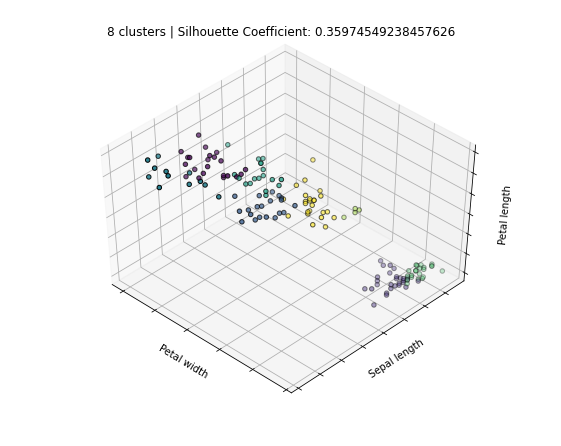

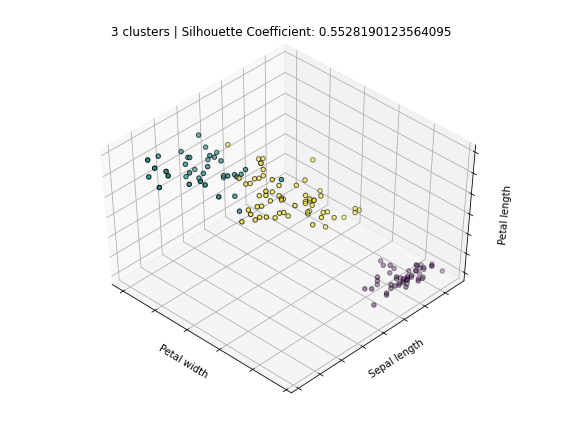

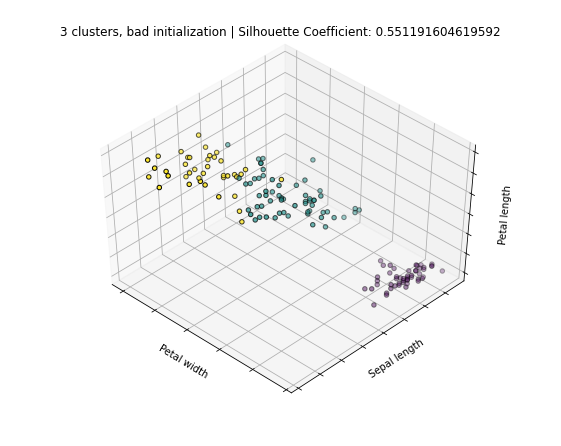

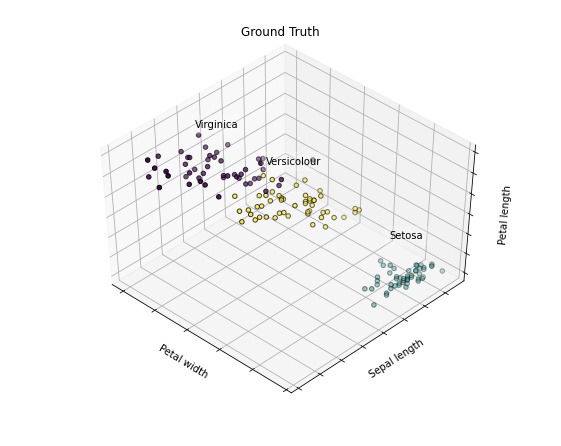

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

np.random.seed(5)

iris = datasets.load_iris()

X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    est.fit(X),
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")

    ax.set_title(titles[fignum - 1] + " | Silhouette Coefficient: " + str(silhouette_score(X, labels)))
    ax.dist = 12

    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

ax.dist = 12

fig.show()

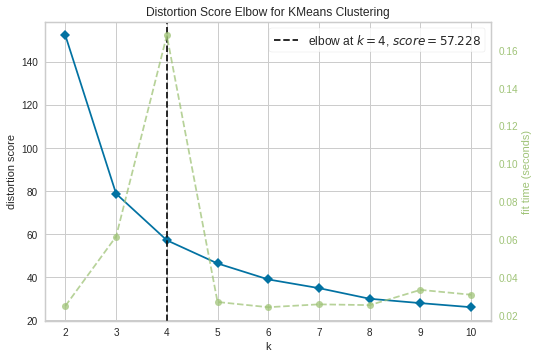

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KElbowVisualizer(KMeans(), k=10)

model.fit(X)
model.show()

# Exercício (Parte I):


1.  Adaptar o código acima para  exibir o valor da métrica silhueta nos 3 primeiros plots.
  * Sobre o score da silhueta: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

1. Explicar o que a métrica indica.

  - R: Algoritmos de Clustering tem a característica de serem não supervisionados, ou seja, não temos acesso as respostas esperadas mesmo durante o treinamento do modelo, como é o caso dos supervisionados, onde conseguimos extrair métricas como Precisão, Acurácia, Sensibilidade ou Especificidade por exemplo, o que torna a avaliação da qualidade do mesmo uma tarefa difícil.
  - Tendo em vista isso, foi criado o Coeficiente de Silhueta, que é uma métrica usada para calcular a qualidade de algoritmos de clustering. Ele tem um retorno variando entre -1 e 1.
  - Essa métrica é extraída a partir do seguinte cálculo: (b-a)/max(a,b)
    - Onde temos a como sendo: a distância média intra cluster, por exemplo a distância média entre cada ponto dentro de um cluster.
    - E b como sendo: a distância média inter-cluster, por exemplo a distância média entre todos os clusters 

1. Interpretar os gráficos segundo o valor da silhueta

  - No gráfico foi adicionado ao título a informação: Silhoutte Coefficiente que recebe um número, que é responsável por indicar:
      - Quando o número está mais próximo de -1 indicam que que os clusters foram assinados de maneira errada.
      - Mais próximo de 0 indicam clusters indiferentes, em outras palavras, que as distâncias são insignificantes, ou seja, os mesmos estão sobrepondo um ao outro.
      - Já o 1 indica que os clusters estão bem separados e são distinguidos de forma clara.

  - Como por exemplo no primeiro plot, que o coeficiente de silhueta recebido foi 0.35, e a partir da visualização do gráfico conseguimos perceber que de fato os clusters estão bem juntos.
  - Um pouco diferente do que acontece nos plots 2 e 3, onde o coeficiente de silhueta recebido foi 0.55 +-, significando que estão um pouco mais bem separados em relação ao anterior, informação que se comprova a partir da visualização do gráfico.

4. Plotar o gráfico Elbow e avaliar o melhor valor de K
  1. O valor condiz com a quantidade de classes original?
    - Não, pois a quantidade de clusters dado como ótimo pelo gráfico de Elbow foi 4, diferente do que vemos a partir da visualização dos onde temos apenas 3 classes. 




In [ ]:
init_list = ['k-means++', 'random']
algorithm_list = ['full', 'elkan']

n = 1

for n_clusters in range(2,10):
  for init in init_list:
    for algorithm in algorithm_list:
      model = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm)
      model.fit(X)

      label = model.predict(X)

      print(f"{n:2d} | Algorithm: {algorithm:5s} - Coefficient Silhouette: {silhouette_score(X, label)}")

      n += 1

 1 | Algorithm: full  - Coefficient Silhouette: 0.6810461692117462
 2 | Algorithm: elkan - Coefficient Silhouette: 0.6810461692117462
 3 | Algorithm: full  - Coefficient Silhouette: 0.6810461692117462
 4 | Algorithm: elkan - Coefficient Silhouette: 0.6810461692117462
 5 | Algorithm: full  - Coefficient Silhouette: 0.5528190123564095
 6 | Algorithm: elkan - Coefficient Silhouette: 0.5528190123564095
 7 | Algorithm: full  - Coefficient Silhouette: 0.5528190123564095
 8 | Algorithm: elkan - Coefficient Silhouette: 0.5528190123564095
 9 | Algorithm: full  - Coefficient Silhouette: 0.4974551890173751
10 | Algorithm: elkan - Coefficient Silhouette: 0.49805050499728737
11 | Algorithm: full  - Coefficient Silhouette: 0.4974551890173751
12 | Algorithm: elkan - Coefficient Silhouette: 0.49805050499728737
13 | Algorithm: full  - Coefficient Silhouette: 0.48874888709310566
14 | Algorithm: elkan - Coefficient Silhouette: 0.48874888709310566
15 | Algorithm: full  - Coefficient Silhouette: 0.49394444

# Exercício (Parte II):

1. Fazer uma busca manual dos melhores parâmetros do K-means.
  1. Considerar os parâmetros: n_clusters (2 a 10), init (todos os valores possíveis), algorithm (full ou elkan).
  1. Fizemos uma tarefa parecida no notebook sobre KNN.
  Considerar os melhores parâmetros segundo o melhor valor de silhueta.
2. Exiba os melhores parâmetros encontrados e seu valor de silhueta.
  - Como a melhor quantidade de clusters para o nosso exemplo eram 2, dada nossa estratégia os mesmos ocuparam as primeiras posição no print. Independente de usar k-means++ ou random como init param e algoritmos full ou elkan, seus resultados foram iguais para 2 clusters, sendo ele igual a: 0.6810461692117462